### Data cleaning process for linear regression model: 2019 Stack Overflow Developer Survey

In [7]:
#import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [8]:
#import data

test = pd.read_csv('/Users/judebuenaseda/Desktop/survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

In [9]:
#check data

test.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [10]:
#check schema data

pd.set_option('display.max_rows', 85)
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


In [11]:
#set potential features to be used for the model

potential_features = ['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'Employment',  
                      'EdLevel', 'UndergradMajor', 'EduOther', 'DevType', 'YearsCode', 'YearsCodePro', 
                      'FizzBuzz', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
                      'WorkRemote', 'LanguageWorkedWith', 'ITperson', 'Age', 'Gender', 'Ethnicity']

In [12]:
#setting Country filter to United States

US = test[test['Country']=='United States']

In [13]:
#create a new dataframe of only US developers

us_devs = US[potential_features]

In [14]:
#drop any missing values

us_devs.dropna(inplace=True)

In [15]:
#check the number of rows and columns

us_devs.shape

(12206, 22)

In [16]:
#create new dataframe of us developers that work full time

us_dev_workers = us_devs[us_devs['Employment']=='Employed full-time']

In [17]:
#filter out any missing values for compensation

ft = us_dev_workers['CompTotal'] != 0

In [18]:
#new dataframe for full-time US developers that have answered the compensation question properly in the survey

dev_df = us_dev_workers[ft]

In [19]:
#check out the number of rows and columns


dev_df.shape

(11485, 22)

In [20]:
#set filter for people that answered weekly or monthly on how often they get paid

weekly = dev_df['CompFreq'] == 'Weekly'
monthly = dev_df['CompFreq'] == 'Monthly'

In [312]:
#lambda function if needed if a dev put their weekly or monthly comp instead of yearly income

#dev_df[weekly]['CompTotal'].apply(lambda x: x*52 if x<2000 else x)
#dev_df[monthly]['CompTotal'].apply(lambda x: x*12 if x<8000 else x)

In [21]:
#reset index

dev_df.reset_index(drop=True, inplace=True)

In [22]:
dev_df

,Respondent,MainBranch,Hobbyist,OpenSourcer,Employment,EdLevel,UndergradMajor,EduOther,DevType,YearsCode,...,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkRemote,LanguageWorkedWith,ITperson,Age,Gender,Ethnicity
0,4,I am a developer by profession,No,Never,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"Developer, full-stack",3,...,61000.0,Yearly,61000.0,80.0,Less than once per month / Never,C;C++;C#;Python;SQL,SIGH,22.0,Man,White or of European descent
1,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,Data or business analyst;Database administrato...,17,...,90000.0,Yearly,90000.0,40.0,All or almost all the time (I'm full-time remote),Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Yes,28.0,Man,White or of European descent
2,23,I am a developer by profession,Yes,Less than once per year,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",Taken an online course in programming or softw...,"Developer, full-stack",3,...,69000.0,Yearly,69000.0,40.0,A few days each month,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,SIGH,22.0,Man,Black or of African descent
3,32,I am a developer by profession,No,Never,Employed full-time,Associate degree,"Information systems, information technology, o...",Completed an industry certification program (e...,"Developer, full-stack",3,...,22000.0,Weekly,1100000.0,37.0,Less than once per month / Never,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,SIGH,21.0,Man,White or of European descent
4,35,I am a developer by profession,No,Never,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",Taken a part-time in-person course in programm...,"Developer, front-end",14,...,80000.0,Yearly,80000.0,40.0,Less than once per month / Never,HTML/CSS;JavaScript,"Fortunately, someone else has that title",35.0,Woman,Black or of African descent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11480,88865,I am a developer by profession,No,Less than once a month but more than once per ...,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A social science (ex. anthropology, psychology...",Taken an online course in programming or softw...,"Developer, front-end",15,...,120000.0,Yearly,120000.0,35.0,"Less than half the time, but at least one day ...",HTML/CSS;JavaScript,Also Yes,36.0,Man,White or of European descent
11481,88874,I am a developer by profession,Yes,Once a month or more often,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A social science (ex. anthropology, psychology...",Taken an online course in programming or softw...,Data scientist or machine learning specialist;...,7,...,185000.0,Weekly,2000000.0,50.0,About half the time,C++;Python;Scala;SQL,Yes,26.0,Man,White or of European descent
11482,88876,I am a developer by profession,Yes,Never,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,"Developer, back-end;Developer, game or graphics",8,...,180000.0,Yearly,180000.0,40.0,"Less than half the time, but at least one day ...",Bash/Shell/PowerShell;C#;HTML/CSS;Java;Python;...,SIGH,23.0,Man,White or of European descent
11483,88877,I am a developer by profession,Yes,Less than once per year,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,Data scientist or machine learning specialist;...,31,...,239000.0,Weekly,2000000.0,45.0,Less than once per month / Never,Bash/Shell/PowerShell;C;Clojur

This section renames columns and answers so that they are integers, 1 for yes and 0 for now.

In [23]:
dev_df.rename(columns={'MainBranch':'FullDev'}, inplace=True)

In [24]:
dev_df['FullDev'].replace({'I am a developer by profession': 1, 'I am not primarily a developer, but I write code sometimes as part of my work': 0}, inplace=True)

In [25]:
dev_df.rename(columns={'ConvertedComp':'Salary'}, inplace=True)

In [26]:
dev_df['Gender'].replace({1: 'Woman', 0: 'Man'}, inplace=True)

In [27]:
dev_df['FizzBuzz'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [28]:
dev_df['Hobbyist'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [29]:
dev_df['YearsCode'].replace('Less than 1 year', 1, inplace=True)
dev_df['YearsCodePro'].replace('Less than 1 year', 1, inplace=True)
dev_df['YearsCodePro'].replace('More than 50 years', 50, inplace=True)
dev_df['YearsCode'].replace('More than 50 years', 50, inplace=True)

In [30]:
dev_df['YearsCode'] = dev_df['YearsCode'].astype(int)

In [31]:
dev_df['YearsCodePro'] = dev_df['YearsCodePro'].astype(int)

In [50]:
dev_df.columns

Index(['Respondent', 'FullDev', 'Hobbyist', 'OpenSourcer', 'Employment',
       'EdLevel', 'UndergradMajor', 'EduOther', 'DevType', 'YearsCode',
       'YearsCodePro', 'FizzBuzz', 'CompTotal', 'CompFreq', 'Salary',
       'WorkWeekHrs', 'WorkRemote', 'LanguageWorkedWith', 'ITperson', 'Age',
       'Gender', 'Ethnicity', 'num_language'],
      dtype='object')

In [41]:
#counting the number of languages people worked with

num = []
for i in range(len(dev_df)):
    num.append(dev_df['LanguageWorkedWith'][i].count(';')+1)

In [42]:
#setting number of langauges people worked with in a new column

dev_df['num_language'] = num

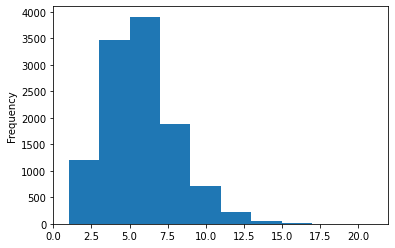

In [43]:
dev_df['num_language'].plot(kind='hist')

In [551]:
dev_df.columns

Index(['Respondent', 'FullDev', 'Hobbyist', 'OpenSourcer', 'Employment',
       'EdLevel', 'UndergradMajor', 'EduOther', 'DevType', 'YearsCode',
       'YearsCodePro', 'FizzBuzz', 'CompTotal', 'CompFreq', 'Salary',
       'WorkWeekHrs', 'WorkRemote', 'LanguageWorkedWith', 'ITperson', 'Age',
       'Gender', 'Ethnicity', 'num_language'],
      dtype='object')

In [54]:
#dropping unecessary columns for the regression model


dev_df.drop(columns=['Employment', 'EduOther', 'CompTotal', 'CompFreq', 'YearsCode'], inplace=True)

In [65]:
dev_df.head(1)

,Respondent,FullDev,Hobbyist,OpenSourcer,EdLevel,UndergradMajor,DevType,YearsCodePro,FizzBuzz,Salary,WorkWeekHrs,WorkRemote,LanguageWorkedWith,ITperson,Age,Gender,Ethnicity,num_language
0,4,1,0,Never,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Developer, full-stack",1,0,61000.0,80.0,Less than once per month / Never,C;C++;C#;Python;SQL,SIGH,22.0,Man,White or of European descent,5


Checking the distribution of the dependent variable to see if there are any outliers needed to be cut

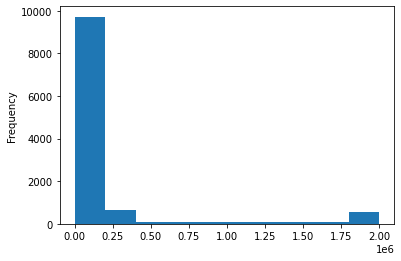

In [56]:
dev_df['Salary'].plot(kind='hist')
plt.show()

In [57]:
salaries = dev_df['Salary']

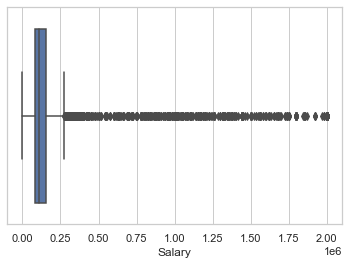

In [58]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=salaries)

In [59]:
#Creating the baseline to check for extreme values using IQR

first_quart = np.quantile(salaries, 0.25)
mid_quart = np.quantile(salaries, 0.5)
third_quart = np.quantile(salaries, 0.75)
IQR = np.quantile(salaries, 0.75) - np.quantile(salaries, 0.25)
Outlier_high = (IQR*1.5) + third_quart
Outlier_low = (IQR*1.5) - first_quart
Outlier_low, Outlier_high

(37000.0, 275000.0)

In [60]:
#setting a filter for extreme values

low = dev_df['Salary'] > Outlier_low
high = dev_df['Salary'] < Outlier_high

In [61]:
#removing extreme values

dev_df = dev_df[low]
dev_df = dev_df[high]

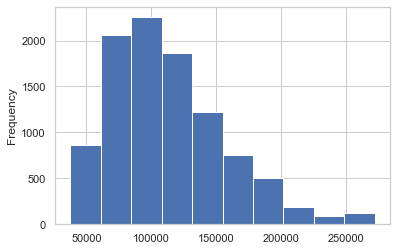

In [63]:
#distribution looks more normal and better distributed from previous

dev_df['Salary'].plot(kind='hist')
plt.show()

In [64]:
#some stats on Salary

dev_df['Salary'].min(), dev_df['Salary'].median(), round(dev_df['Salary'].mean()), dev_df['Salary'].max()

(37600.0, 105000.0, 113170.0, 272313.0)

save final dataframe into a .csv for used in EDA and linear regression model

In [590]:
#dev_df.to_csv('dev_df.csv')